In [70]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
researcher = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/researcher.csv')
mentorship = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/mentorship.csv')
files_field = ['chemistry.csv','physics.csv','neuro.csv']

In [3]:
fields_rl = {}
for item in files_field:
    tp = pd.read_csv('./fields/'+item)
    tn = item.split('.')[0]
    fields_rl[tn] = tp

In [20]:
# neuro = fields_rl['chemistry']
# neuro = fields_rl['physics']
neuro = fields_rl['neuro']

neuro = neuro[neuro.StopYear>0]
neuro.shape

(104896, 9)

In [25]:
neuro.head(2)

,Unnamed: 0,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear,NumOfMenteesOfTheMentor10,NumOfMenteesOfTheMentor6
0,0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005,11,9
1,1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006,11,9


In [22]:
mentee = neuro.MenteeID; mentee_np = np.array(mentee)
mentor = neuro.MentorID; mentor_np = np.array(mentor)
StopYear = neuro.StopYear; StopYear_np = np.array(StopYear)

In [26]:
#补充每位老师在招生该学生时10年范围内的招生数 (group size in a 10 years window)
tp_l_10 = []
tp_l_6 = []
count = 0
for i in range(len(mentor_np)):
#     print(count)
    mto = mentor_np[i]                   #老师(mentor)
    mte = mentee_np[i]                   #学生(mentee)
    yy = StopYear_np[i]                  #受训年份(StopYear)
    all_yy = pd.DataFrame(StopYear_np[mentor_np==mto],columns=[0]) #该老师所有学生的受训时间(StopYear of all students)
    tp = all_yy[0][(all_yy[0]>=yy-5)&(all_yy[0]<yy+5)]             #该老师在该学生受训时刻前后10年内的学生数(cotrainees in a 10 years window)
    tp_l_10.append(len(tp))
    tp = all_yy[0][(all_yy[0]>=yy-3)&(all_yy[0]<yy+3)]             #该老师在该学生受训时刻前后6年内的学生数 (cotrainees in a 6 years window)
    tp_l_6.append(len(tp))
#     count+=1
neuro['NumOfMenteesOfTheMentor10'] = tp_l_10
neuro['NumOfMenteesOfTheMentor6'] = tp_l_6

In [24]:
# chemistry_GSE = neuro  #Group Size Evolution
# with open('chemistry_GSE.pickle','wb')as f:
#     pickle.dump(chemistry_GSE,f)
    
# physics_GSE = neuro
# with open('physics_GSE.pickle','wb')as f:
#     pickle.dump(physics_GSE,f)
    
# neuro_GSE = neuro
# with open('neuro_GSE.pickle','wb')as f:
#     pickle.dump(neuro_GSE,f)

In [61]:
interval = [[1900,1960],[1960,1975],[1975,1985],[1985,1995],[1995,2015]]
field_GSE = {}
field_GSE_6 = {}
for k in fields_rl:   # key is field's name
    nm = k + '_GSE.pickle'
    with open(nm,'rb')as f:
        neuro = pickle.load(f)
    GSE = {}
    GSE_6 = {}
    for itl in interval:
        i0 = itl[0];i1 = itl[1]
        temp = np.array(neuro[['CID','NumOfMenteesOfTheMentor10']][(neuro.StopYear>i0)&(neuro.StopYear<=i1)])
        GSE[i1] = temp[:,1]
        
        temp = np.array(neuro[['CID','NumOfMenteesOfTheMentor6']][(neuro.StopYear>i0)&(neuro.StopYear<=i1)])
        GSE_6[i1] = temp[:,1]
        
    field_GSE[k] = GSE
    field_GSE_6[k] = GSE_6

In [28]:
field_GSE

{'chemistry': {1960: array([4, 4, 4, ..., 1, 1, 1]),
  1975: array([ 1, 14, 19, ...,  3,  1,  1]),
  1985: array([ 4,  2, 15, ...,  4,  5,  3]),
  1995: array([12,  1,  5, ...,  2,  2,  1]),
  2015: array([ 1,  1,  1, ...,  6,  6, 13])},
 'physics': {1960: array([6, 1, 6, ..., 2, 6, 4]),
  1975: array([14, 19, 13, ...,  1,  2,  2]),
  1985: array([ 4, 18,  1, ...,  1,  1,  1]),
  1995: array([ 5,  3, 21, ...,  2,  2,  1]),
  2015: array([20,  1,  2, ...,  8,  1,  1])},
 'neuro': {1960: array([6, 2, 2, ..., 1, 4, 1]),
  1975: array([3, 1, 2, ..., 1, 2, 3]),
  1985: array([1, 5, 3, ..., 1, 1, 2]),
  1995: array([ 1,  3, 12, ...,  3,  1,  1]),
  2015: array([11, 11, 12, ...,  5,  1,  1])}}

<ipython-input-77-921ee10b7a8a>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('GSE.pdf')
/Users/yanmemgxing/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


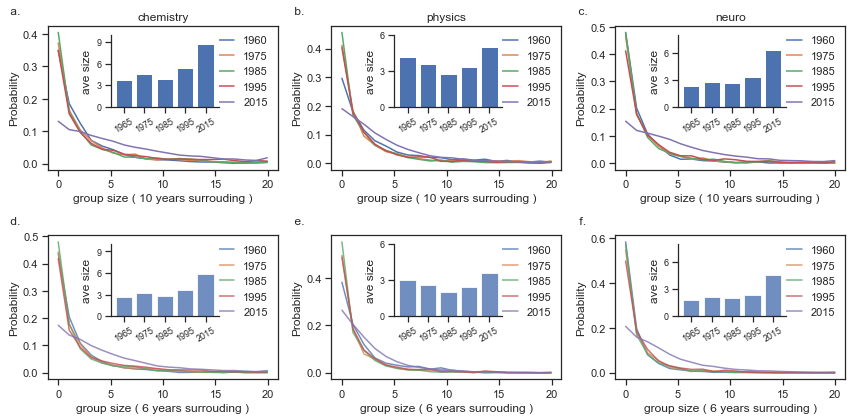

In [77]:
sns.set(style='ticks', font_scale=1, font='Arial')
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
fig = plt.figure(figsize=(12,6),tight_layout=1)#figsize=(10,3.5)
for i in range(0,3):
    fk = list(field_GSE.keys())
    k = fk[i]
    tp1 = field_GSE[k]
    ax = fig.add_subplot(2,3,i+1)
    AVE = []
    for k1 in tp1:
        tp2 = tp1[k1]
        results, edges = np.histogram(tp2,density=1,range=[0,21],bins=20)
        binWidth = edges[1] - edges[0]
        ax.plot(edges[0:-1],results,label=k1,alpha=1)
        ave_r = np.mean(tp2)
        AVE.append(ave_r)
        
    axins = inset_axes(ax, width=1.5, height=1,bbox_to_anchor=(.25, .4, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)
    axins.bar(range(len(AVE)),AVE,label='Survival Mentee')
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False) 
    X_ticks = [1965,1975,1985,1995,2015]
    c = axins.set_xticks(ticks=range(len(AVE)),labels=X_ticks,rotation=30)
    axins.yaxis.set_major_locator(MultipleLocator(3))  
    axins.tick_params(labelsize=9)
    axins.set_ylabel('ave size')
    if i==0:
        axins.set_ylim([0,10])
    elif i==1:
        axins.set_ylim([0,6])
    else:
        axins.set_ylim([0,8])
#     axins.set_ylim([-0.5,4.5]) 
        
    legend = ax.legend(loc='upper right')
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') 
    legend.get_frame().set_linewidth(0.0)
    ax.text(-0.14, 1.1,l_index[i],ha='center', va='center', transform=ax.transAxes)
    ax.set_title(k)
    ax.set_xlabel('group size ( 10 years surrouding )')
    ax.set_ylabel('Probability')
    
    
    k = fk[i]
    tp1 = field_GSE_6[k]
    ax = fig.add_subplot(2,3,i+4)
    AVE = []
    for k1 in tp1:
        tp2 = tp1[k1]
        results, edges = np.histogram(tp2,density=1,range=[0,21],bins=20)
        binWidth = edges[1] - edges[0]
        ax.plot(edges[0:-1],results,label=k1,alpha=0.8)
        ave_r = np.mean(tp2)
        AVE.append(ave_r)
        
    axins = inset_axes(ax, width=1.5, height=1,bbox_to_anchor=(.25, .4, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)
    axins.bar(range(len(AVE)),AVE,alpha=0.8)
    axins.spines['top'].set_visible(False)
    axins.spines['right'].set_visible(False) 
    X_ticks = [1965,1975,1985,1995,2015]
    c = axins.set_xticks(ticks=range(len(AVE)),labels=X_ticks,rotation=30)
    axins.tick_params(labelsize=9)
    axins.set_ylabel('ave size')
    axins.yaxis.set_major_locator(MultipleLocator(3))  # 设置2倍数
    if i==0:
        axins.set_ylim([0,10])
    elif i==1:
        axins.set_ylim([0,6])
    else:
        axins.set_ylim([0,8])
#     axins.set_ylim([-0.5,4.5]) 
        
    legend = ax.legend(loc='upper right')
    frame = legend.get_frame() 
    frame.set_alpha(1) 
    frame.set_facecolor('none') # 设置图例legend背景透明
    legend.get_frame().set_linewidth(0.0)
    ax.text(-0.14, 1.1,l_index[i+3],ha='center', va='center', transform=ax.transAxes)
#     ax.set_title(k)
    ax.set_xlabel('group size ( 6 years surrouding )')
    ax.set_ylabel('Probability')
fig.savefig('GSE.pdf')  